# Project 2: Reproducibility in Natural Language Processing



### Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [2]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

In [3]:
sou = pd.read_csv('data/SOTU.csv')
sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169


## Part 2: Simple Text Processing - Tokenization, Lemmatization, Word Frequency, Vectorization (20 pts)
```
python -m spacy download en_core_web_sm
```

### Processing Speeches with SpaCy

In [4]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [5]:
# subset the speech dataframe for speeches from 2000 and onwards

In [6]:
# Process each speeches using the 'nlp' function
# Hint - loop through each speech and pass the text into the nlp function above, storing the output in a list
# should take about 30 seconds to process

In [7]:
# Subset the speech dataframe for speeches from 2000 and onwards
sou_recent = sou[sou['Year'] >= 2000]
docs = []
for text in tqdm(sou_recent['Text']):
    docs.append(nlp(text))

100%|██████████| 25/25 [00:23<00:00,  1.07it/s]


### Analyze Tokens vs Lemmas

#### Token List

In [8]:
tokens = [token.text.lower() for doc in docs for token in doc 
          if not token.is_stop and not token.is_punct and not token.is_space]
token_count = Counter(tokens).most_common(20)
token_count

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

#### Lemma List

In [9]:
lemmas = [token.lemma_.lower() for doc in docs for token in doc 
          if not token.is_stop and not token.is_punct and not token.is_space]
lemma_count = Counter(lemmas).most_common(20)
lemma_count

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

### Common Words

#### Common Words per Year Function

In [10]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speeches for a given year and returns
    the n most common non-stopword/punctuation lemmas.

    Inputs:
        - df raw unprocessed sou dataframe
        - year
        - n
    Outputs:
        - top n words for that years
        
    """

    df_subset = df[df['Year'].astype(int) == int(year)]

    if df_subset.empty:
        print(f"No speeches found for year {year}")
        return []
    
    texts = df_subset["Text"].tolist()
    speeches = list(tqdm(nlp.pipe(texts, batch_size=50), total=len(texts), desc=f"Processing {year} speeches"))
    

    lemmas = [
        token.lemma_.lower()
        for doc in speeches
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    
    top_n = Counter(lemmas).most_common(n)
    
    return top_n

In [11]:
top_words_2024 = get_most_common_words(sou, 2024, n=10)
top_words_2024

Processing 2024 speeches: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

#### Comparing 2023 to 2017

In [12]:
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

Processing 2017 speeches: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


In [13]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [14]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [15]:
# Hint - put the words and counts into a pd Dataframe for better structure
# and to make plotting easier
df_2017 = pd.DataFrame(words_2017, columns=["word", "count"])
df_2023 = pd.DataFrame(words_2023, columns=["word", "count"])

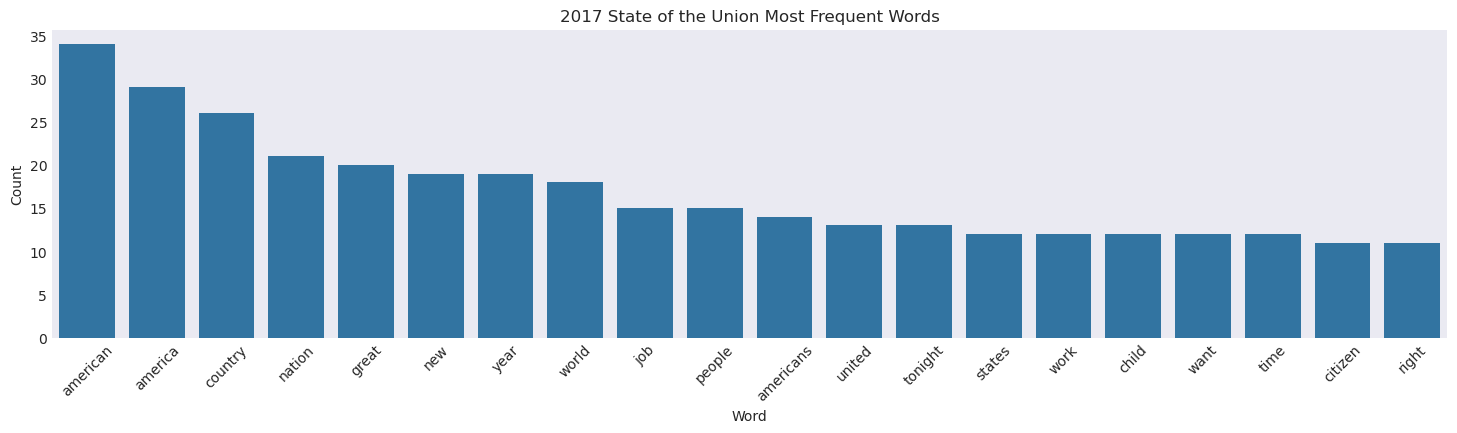

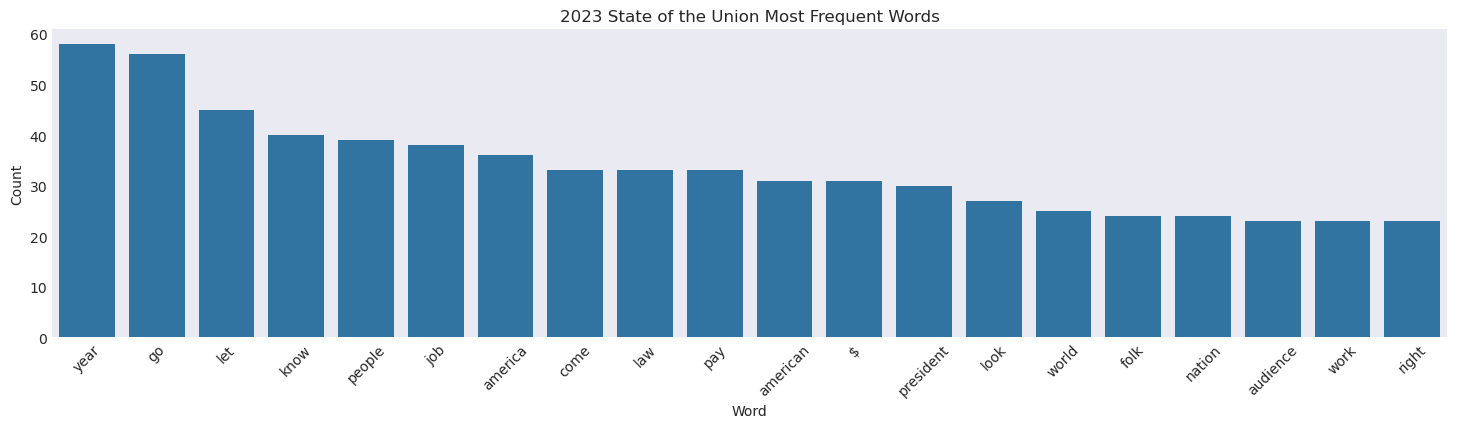

In [16]:
#Plot for 2017 State of the Union MFW

plt.figure(figsize=(18, 4))
sns.barplot(data=df_2017, x="word", y="count");
plt.title("2017 State of the Union Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45);
plt.savefig("outputs/2017_state_of_union_mfw.png")

#Plot for 2023 State of the Union MFW

plt.figure(figsize=(18, 4))
sns.barplot(data=df_2023, x="word", y="count");
plt.title("2023 State of the Union Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45);

plt.savefig("outputs/2023_state_of_union_mfw.png")

### TF-IDF Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### Train the Vectorizer and Transform the Data

In [18]:
# you may use this as input to fit the TF-IDF vectorizer
raw_docs = sou["Text"].to_list()

In [19]:
tfidf_model = TfidfVectorizer()
tfidf_vectors = tfidf_model.fit_transform(raw_docs)

#### Plot Speeches

- First used PCA to generate the first chart
- Second use seaborn heatmap with a log-scaled color axis to generate the second chart

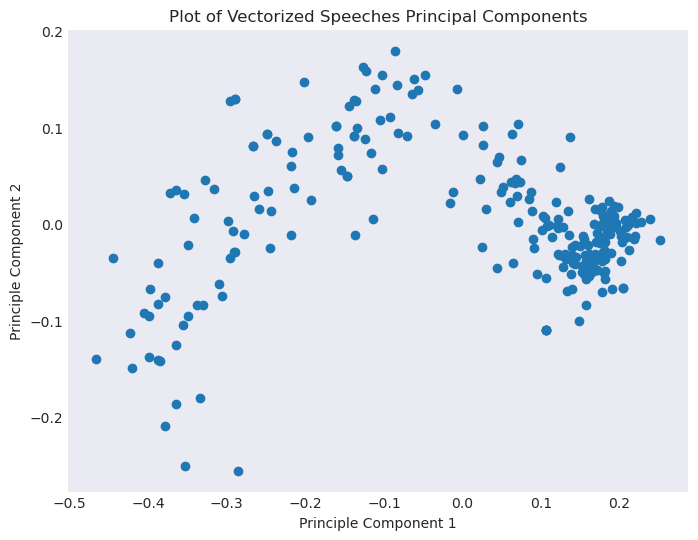

In [20]:
# Step 1: Set PCA to find first 2 principal components
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_vectors.toarray()) 

# Step 2: Create a new dataframe where each row is a speech, and each column is a projection onto
# one of the two principal components
pca_df = pd.DataFrame(tfidf_2d, columns=["PC1", "PC2"])

# Plot Data Visualization (Matplotlib)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.title("Plot of Vectorized Speeches Principal Components")
plt.savefig("outputs/pca_vectorized_speeches.png")

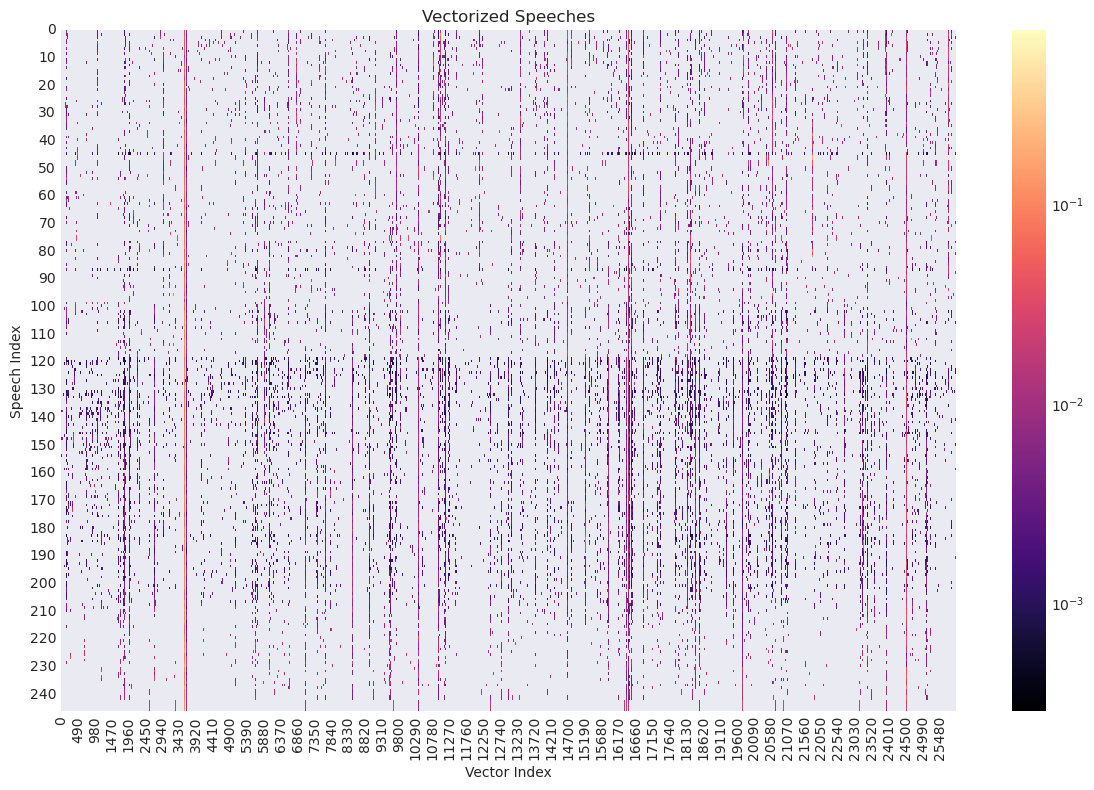

In [30]:
# Hint - vectorized_docs is a sparse matrix whose rows are speeches and columns are tokens, with each
# value being a TF-IDF score. Densify this array first, and then plot using seaborn.

from matplotlib.colors import LogNorm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

dense = tfidf_vectors.todense() 
n = dense.shape[0]

plt.figure(figsize=(12, 8))
sns.heatmap(
    dense,
    norm=LogNorm(),
    cmap="magma")

y_ticks = np.arange(0, n + 1, 10) 
y_labels = y_ticks.astype(str)

plt.gca().set_yticks(y_ticks)
plt.gca().set_yticklabels(y_labels, rotation=0)

plt.title("Vectorized Speeches")
plt.xlabel("Vector Index")
plt.ylabel("Speech Index")
plt.tight_layout()
plt.savefig("outputs/vectorized_speeches_heatmap.png")

#### Get the TF-IDF value for certain words and documents

In [22]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [23]:
word_nums = [tfidf_model.vocabulary_[w] for w in word_list]

In [24]:
idf_score = tfidf_model.idf_[word_nums]

In [25]:
tf_idf = tfidf_vectors[0, word_nums].toarray().ravel()

In [26]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
